In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/temizveri/undersampled_data.csv
/kaggle/input/stemmeddata/StemmedData.csv


In [4]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate,train_test_split
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from nltk.tokenize import word_tokenize
import snowballstemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from snowballstemmer import TurkishStemmer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
 df=pd.read_csv("/kaggle/input/temizveri/undersampled_data.csv")

In [6]:
df

,words,haber,sinif
0,133,şeklinde konuştu avrupa alışık olmadığını beli...,Siyaset
1,133,nelik olsaydı mesele değildi ülkenin cumhurbaş...,Siyaset
2,125,rde vicdanlarda kabul görmeyecek siyaseten sor...,Siyaset
3,141,chp kızan hdp ilde aday çıkaracak chp hdp örtü...,Siyaset
4,136,gökhan montrö bizim güvencemiz dolayısı altern...,Siyaset
...,...,...,...
280671,139,kuşadası bodrum milas mevsim normallerinin üze...,Çevre
280672,122,ması amacıyla çalışma yürütülmektedir denildi ...,Çevre
280673,130,i bölümü başkanı prof süleyman yücel şenyurt b...,Çevre
280674,606,patara özel çevre koruma bölgesi nden geçtiğim...,Çevre


In [7]:
# dff=df.copy()

In [8]:
# dff['haber'] = dff['haber'].apply(word_tokenize)

In [9]:
# dn=dff.copy()

In [10]:
#dn

## Stemming

In [11]:
#stemmer = TurkishStemmer()
#dn["haber"] = dn["haber"].apply(lambda x: [stemmer.stemWord(word) for word in x])

In [12]:
#dn.to_csv("StemmedData.csv")

In [13]:
dn=pd.read_csv("/kaggle/input/stemmeddata/StemmedData.csv")

In [14]:
dn

,words,haber,sinif
0,133,"['şekl', 'konuş', 'avrup', 'alışık', 'olmadık'...",Siyaset
1,133,"['nelik', 'olsa', 'mesel', 'değil', 'ülke', 'c...",Siyaset
2,125,"['rde', 'vicdan', 'kabul', 'görmeyecek', 'siya...",Siyaset
3,141,"['chp', 'kıza', 'hdp', 'il', 'aday', 'çıkaraca...",Siyaset
4,136,"['gökha', 'montrö', 'biz', 'güvence', 'dolayıs...",Siyaset
...,...,...,...
280671,139,"['kuşadas', 'bodr', 'milas', 'mevs', 'normalle...",Çevre
280672,122,"['mas', 'amaç', 'çalışma', 'yürütülmek', 'deni...",Çevre
280673,130,"['i', 'böl', 'başka', 'prof', 'süleyma', 'yüce...",Çevre
280674,606,"['patar', 'özel', 'çevre', 'kor', 'bölges', 'n...",Çevre


## Data Split

In [15]:
news_dict={'Magazin':0,'Siyaset':1,'Sağlık':2,'Spor':3,'Kültür-Sanat':4,'Turizm':5,'Finans-Ekonomi':6,'Bilim-Teknoloji':7,'Çevre':8} 
dn["sinif"]=dn["sinif"].map(news_dict)


In [16]:
df["sinif"]=df["sinif"].map(news_dict)

In [17]:
def convert_to_string(s):
    s = s.strip('[]')  # Köşeli parantezleri kaldır
    s = s.replace('...', '')  # Üç nokta yer tutucusunu kaldır
    return ' '.join(s.split(','))  # Virgüllerle ayrılmış kelimeleri birleştir

dn['haber'] = dn['haber'].apply(convert_to_string)

In [18]:
dn['haber'] = dn['haber'].apply(lambda x: ' '.join(x.replace("'", "").split()))

In [19]:
dn

,words,haber,sinif
0,133,şekl konuş avrup alışık olmadık belir şentop d...,1
1,133,nelik olsa mesel değil ülke cumhurbaşka fatura...,1
2,125,rde vicdan kabul görmeyecek siyase sorgulanaca...,1
3,141,chp kıza hdp il aday çıkaracak chp hdp örtül i...,1
4,136,gökha montrö biz güvence dolayıs alternatif ol...,1
...,...,...,...
280671,139,kuşadas bodr milas mevs normaller üzer gerçekl...,8
280672,122,mas amaç çalışma yürütülmek denil beledi ekip ...,8
280673,130,i böl başka prof süleyma yücel şenyurt başkanl...,8
280674,606,patar özel çevre kor bölges nden geçtik şubat ...,8


In [20]:
XX = df["haber"]
yy = df["sinif"]

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=42)

In [21]:
X = dn["haber"]
y = dn["sinif"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Count Vectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizerr = CountVectorizer()
count_vectorizerr.fit(XX_train)

CountVectorizer()

In [23]:
XX_train_count = count_vectorizerr.transform(XX_train)
XX_test_count = count_vectorizerr.transform(XX_test)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)

CountVectorizer()

In [25]:
X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

## TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tff_idf_vectorizer = TfidfVectorizer()
tff_idf_vectorizer.fit(XX_train)

TfidfVectorizer()

In [27]:
XX_train_tf_idf = tff_idf_vectorizer.transform(XX_train)
XX_test_tf_idf = tff_idf_vectorizer.transform(XX_test)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer()

In [29]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# **Models**

## **XGBoost**

## Count Vectorizer

In [30]:
!pip install xgboost

In [31]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_count, label=y_train)
dtest = xgb.DMatrix(X_test_count, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 50
bstCV = xgb.train(params, dtrain, num_round)


In [32]:

preds = bstCV.predict(dtest)


accuracy = (preds == y_test).mean()
print("XGBoost CV Accuracy:", accuracy)

XGBoost CV Accuracy: 0.8743987743904611


In [33]:
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print("XGBoost CV Classification Report:")
print(report)

XGBoost CV Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7653
           1       0.81      0.82      0.81      7567
           2       0.92      0.95      0.94     15350
           3       0.97      0.97      0.97      7666
           4       0.83      0.89      0.86     15253
           5       0.88      0.81      0.84      7653
           6       0.88      0.86      0.87      7807
           7       0.90      0.88      0.89      7591
           8       0.80      0.78      0.79      7663

    accuracy                           0.87     84203
   macro avg       0.87      0.86      0.87     84203
weighted avg       0.87      0.87      0.87     84203



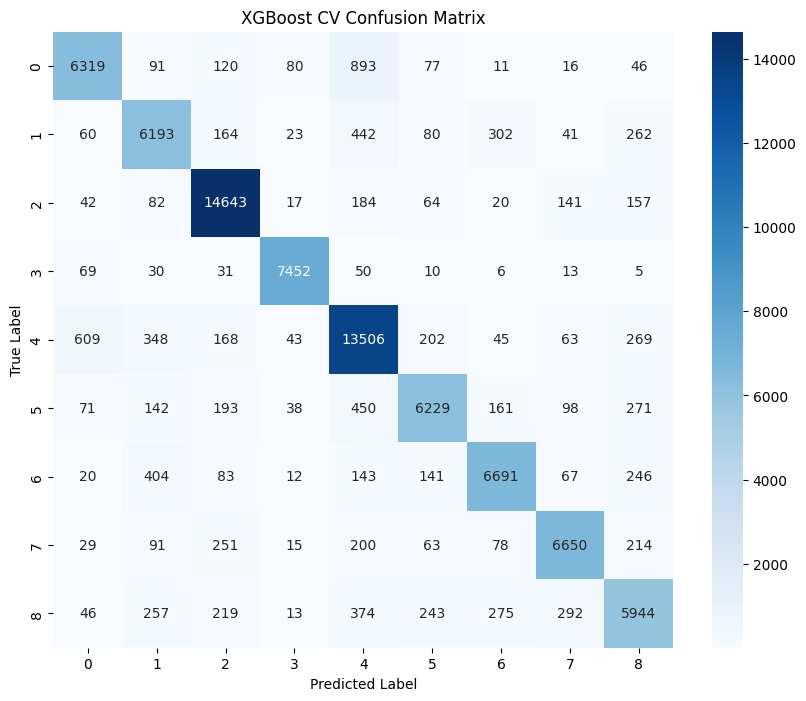

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Unstemmed Data

In [35]:
import xgboost as xgb

ddtrain = xgb.DMatrix(XX_train_count, label=yy_train)
ddtest = xgb.DMatrix(XX_test_count, label=yy_test)


params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 50
UnbstCV = xgb.train(params, ddtrain, num_round)

In [36]:
preds = UnbstCV.predict(ddtest)


accuracy = (preds == yy_test).mean()
print("XGBoost with Unstemmed Data CV Accuracy:", accuracy)

XGBoost with Unstemmed Data CV Accuracy: 0.8599931118843747


In [37]:
report = classification_report(yy_test, preds)
matrix = confusion_matrix(yy_test, preds)

print("XGBoost with Unstemmed Data CV Accuracy Classification Report:")
print(report)

XGBoost with Unstemmed Data CV Accuracy Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      7653
           1       0.81      0.79      0.80      7567
           2       0.91      0.95      0.93     15350
           3       0.97      0.96      0.97      7666
           4       0.78      0.89      0.83     15253
           5       0.88      0.78      0.83      7653
           6       0.88      0.84      0.86      7807
           7       0.89      0.87      0.88      7591
           8       0.80      0.74      0.77      7663

    accuracy                           0.86     84203
   macro avg       0.87      0.85      0.86     84203
weighted avg       0.86      0.86      0.86     84203



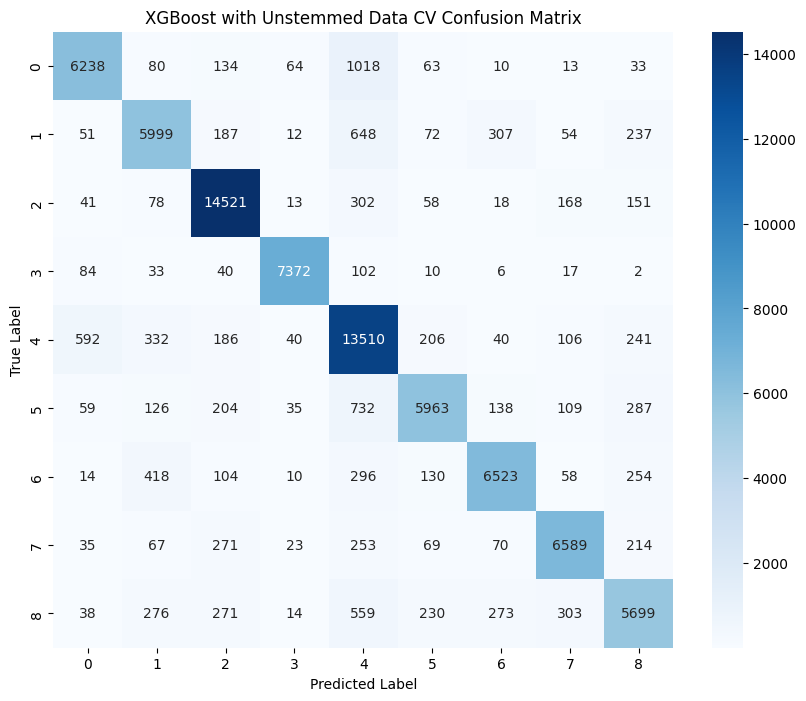

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost with Unstemmed Data CV Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## TF-IDF 

In [39]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_tf_idf, label=y_train)
dtest = xgb.DMatrix(X_test_tf_idf, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 50
bstTF = xgb.train(params, dtrain, num_round)

In [40]:
# Test setinde tahmin yapma
preds = bstTF.predict(dtest)

# Doğruluk oranını hesaplama
accuracy = (preds == y_test).mean()
print("XGBoost TF-IDF Accuracy:", accuracy)

XGBoost TF-IDF Accuracy: 0.8804080614704939


In [41]:
report = classification_report(y_test, preds)
matrix = confusion_matrix(y_test, preds)

print("XGBoost TF-IDF Classification Report:")
print(report)

XGBoost TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7653
           1       0.82      0.83      0.82      7567
           2       0.93      0.96      0.94     15350
           3       0.97      0.97      0.97      7666
           4       0.84      0.89      0.86     15253
           5       0.88      0.82      0.85      7653
           6       0.89      0.86      0.88      7807
           7       0.92      0.90      0.91      7591
           8       0.81      0.78      0.80      7663

    accuracy                           0.88     84203
   macro avg       0.88      0.87      0.87     84203
weighted avg       0.88      0.88      0.88     84203



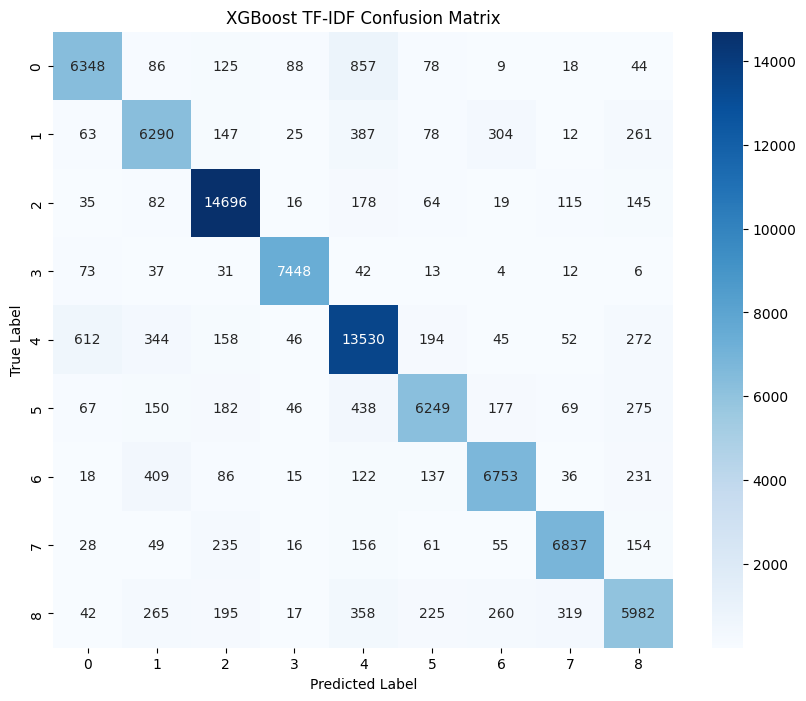

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost TF-IDF Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Unstemmed Data

In [43]:
import xgboost as xgb

ddtrain = xgb.DMatrix(XX_train_tf_idf, label=yy_train)
ddtest = xgb.DMatrix(XX_test_tf_idf, label=yy_test)

params = {
    'objective': 'multi:softmax',  
    'tree_method': 'hist',  
    'device': 'cuda',
    'num_class': 9 
}

num_round = 30
bstTFF = xgb.train(params, ddtrain, num_round)

In [44]:
preds = bstTFF.predict(ddtest)
accuracy = (preds == y_test).mean()
print("Unstemmed Data XGBoost TF-IDF Accuracy:", accuracy)

Unstemmed Data XGBoost TF-IDF Accuracy: 0.8508960488343645


In [45]:
report = classification_report(yy_test, preds)
matrix = confusion_matrix(yy_test, preds)

print("Unstemmed Data XGBoost TF-IDF Classification Report:")
print(report)

Unstemmed Data XGBoost TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      7653
           1       0.80      0.79      0.79      7567
           2       0.90      0.94      0.92     15350
           3       0.97      0.95      0.96      7666
           4       0.75      0.88      0.81     15253
           5       0.87      0.76      0.82      7653
           6       0.88      0.83      0.86      7807
           7       0.90      0.88      0.89      7591
           8       0.80      0.72      0.76      7663

    accuracy                           0.85     84203
   macro avg       0.86      0.84      0.85     84203
weighted avg       0.85      0.85      0.85     84203



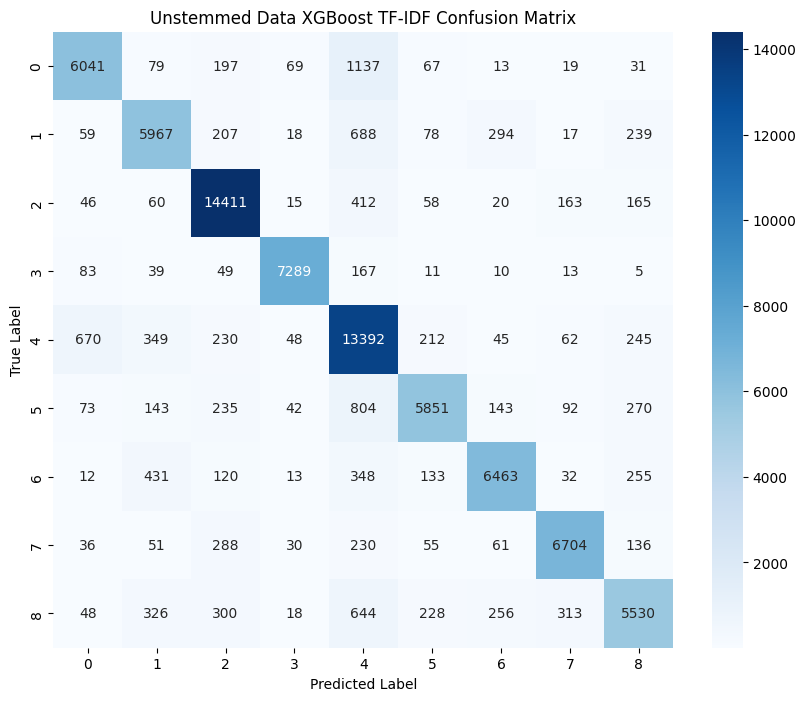

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Unstemmed Data XGBoost TF-IDF Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **LightGBM**

In [47]:
!pip install lightgbm


In [48]:
import lightgbm as lgb

In [49]:
# LightGBM Dataset formatına dönüştürme
dtrain = lgb.Dataset(X_train_count.astype(float), label=y_train)
dtest = lgb.Dataset(X_test_count.astype(float), label=y_test, reference=dtrain)


# Model parametreleri
params = {
    'objective': 'multiclass',
    'num_class': 9,
    'metric': 'multi_logloss',
    'device': 'gpu',  
    
}

num_round = 50
lgbModel = lgb.train(params, dtrain, num_round, valid_sets=[dtest])

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 205082
[LightGBM] [Info] Number of data points in the train set: 196473, number of used features: 39868
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (0.75 MB) transferred to GPU in 0.001645 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score -2.397793
[LightGBM] [Info] Start training from score -2.392991
[LightGBM] [Info] Start training from score -1.705879
[LightGBM] [Info] Start training from score -2.398522
[LightGBM] [Info] Start training from score -1.703164
[LightGBM] [Info] Start training from score -2.397793
[LightGBM] [Info] Start training from score -2.406452
[LightGBM] [Info] Start training from score -2.394329
[LightGBM] [Info] Start training from sc

In [50]:

y_pred = lgbModel.predict(X_test_count.astype(float))

y_pred_class = np.argmax(y_pred, axis=1)

accuracy = (y_pred_class == y_test).mean()
print("Unstemmed Data XGBoost TF-IDF Accuracy:", accuracy)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_class))


Unstemmed Data XGBoost TF-IDF Accuracy: 0.8804436896547629
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      7653
           1       0.82      0.83      0.82      7567
           2       0.92      0.96      0.94     15350
           3       0.97      0.97      0.97      7666
           4       0.85      0.89      0.87     15253
           5       0.87      0.83      0.85      7653
           6       0.88      0.86      0.87      7807
           7       0.89      0.88      0.89      7591
           8       0.81      0.78      0.80      7663

    accuracy                           0.88     84203
   macro avg       0.88      0.87      0.87     84203
weighted avg       0.88      0.88      0.88     84203



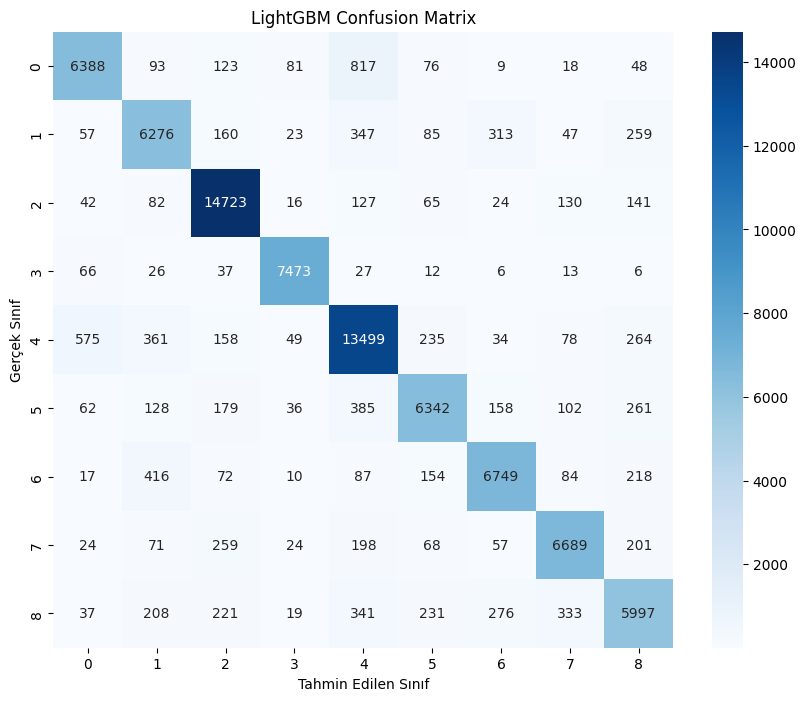

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = lgbModel.predict(X_test_count.astype(float))
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_class)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('LightGBM Confusion Matrix')
plt.show()


# **KNN**

# **BERT**

In [52]:
!pip install transformers
!pip install torch

In [53]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
import pandas as pd

train_texts, test_texts, train_labels, test_labels = train_test_split(dn['haber'], dn['sinif'], test_size=0.3, random_state=42)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')


# Tokenizing dat
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128, return_tensors='pt')
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128, return_tensors='pt')

# Verify that all encoded inputs are of the same length
assert len(train_encodings['input_ids']) == len(train_encodings['attention_mask']) == len(train_labels), "Mismatch in train dataset lengths"
assert len(test_encodings['input_ids']) == len(test_encodings['attention_mask']) == len(test_labels), "Mismatch in test dataset lengths"

# Convert labels to tensors
train_labels = torch.tensor(train_labels.values if isinstance(train_labels, pd.Series) else train_labels)
test_labels = torch.tensor(test_labels.values if isinstance(test_labels, pd.Series) else test_labels)

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [54]:
BertModel = BertForSequenceClassification.from_pretrained('dbmdz/bert-base-turkish-cased', num_labels=9)

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
BertModel.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [56]:
from transformers import AdamW
import torch.nn as nn
optimizer = AdamW(BertModel.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

num_epochs = 3
patience = 3
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    BertModel.train()
    running_loss = 0.0
    for i, batch in enumerate(train_loader):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = BertModel(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 1000 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] Average Training Loss: {avg_train_loss:.4f}")


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch [1/3], Step [1000/6140], Loss: 0.4535
Epoch [1/3], Step [2000/6140], Loss: 0.2137
Epoch [1/3], Step [3000/6140], Loss: 0.4613
Epoch [1/3], Step [4000/6140], Loss: 0.4697
Epoch [1/3], Step [5000/6140], Loss: 0.2491
Epoch [1/3], Step [6000/6140], Loss: 0.1659
Epoch [1/3] Average Training Loss: 0.4035
Epoch [2/3], Step [1000/6140], Loss: 0.2521
Epoch [2/3], Step [2000/6140], Loss: 0.2186
Epoch [2/3], Step [3000/6140], Loss: 0.1570
Epoch [2/3], Step [4000/6140], Loss: 0.3420
Epoch [2/3], Step [5000/6140], Loss: 0.0708
Epoch [2/3], Step [6000/6140], Loss: 0.0329
Epoch [2/3] Average Training Loss: 0.2808
Epoch [3/3], Step [1000/6140], Loss: 0.3802
Epoch [3/3], Step [2000/6140], Loss: 0.3082
Epoch [3/3], Step [3000/6140], Loss: 0.2626
Epoch [3/3], Step [4000/6140], Loss: 0.3027
Epoch [3/3], Step [5000/6140], Loss: 0.4224
Epoch [3/3], Step [6000/6140], Loss: 0.2102
Epoch [3/3] Average Training Loss: 0.2254


In [63]:
all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = BertModel(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        
        # Gerçek etiketleri ve tahminleri listelere ekle
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

In [64]:
report = classification_report(all_labels, all_predictions)
cm = confusion_matrix(all_labels, all_predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7653
           1       0.87      0.87      0.87      7567
           2       0.95      0.97      0.96     15350
           3       0.98      0.98      0.98      7666
           4       0.91      0.93      0.92     15253
           5       0.88      0.92      0.90      7653
           6       0.90      0.91      0.91      7807
           7       0.92      0.78      0.84      7591
           8       0.83      0.88      0.85      7663

    accuracy                           0.91     84203
   macro avg       0.91      0.90      0.91     84203
weighted avg       0.91      0.91      0.91     84203



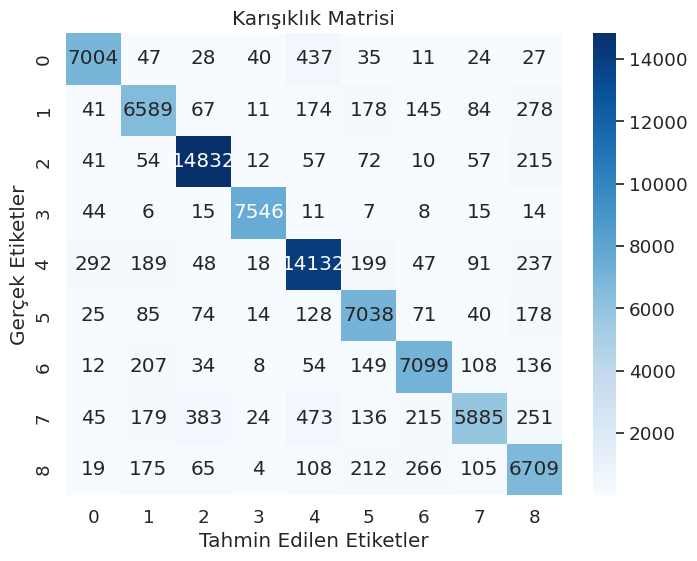

In [65]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Tahmin Edilen Etiketler")
    plt.ylabel("Gerçek Etiketler")
    plt.title("Karışıklık Matrisi")
    plt.show()
classes = [str(i) for i in range(len(cm))]

plot_confusion_matrix(cm, classes)

In [66]:
torch.save(BertModel.state_dict(), 'BertModel.bst')

In [59]:
lgbModel.save_model('lgb_model.txt') 

In [61]:
bstTF.save_model('xgb_model.json')

In [67]:
import zipfile
import os

def zip_files(directory, zip_filename):
    # Belirtilen dizindeki tüm dosyaları zip dosyasına ekleyin
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(directory, '..')))

# Zip dosyası oluşturmak için dizin ve zip dosya adını belirtin
directory_to_zip = "/kaggle/working/"
zip_filename = "models.zip"
zip_files(directory_to_zip, zip_filename)
